# Линейная регрессия

<img src="imgs/regression_comics.png">

Матрица объектов: $X \in  {\rm I\!R} ^{l \times n}$

Вектор значений: $\overline{y} \in  {\rm I\!R} ^{l}$

Вектор весов: $\overline{w} \in  {\rm I\!R} ^{n}$

Предсказание алгоритма:
$$
  a(\overline{x_i}, \overline{w}) = \sum_{j=1}^{n} w_j x_{ij}
$$

Функционал квадрата ошибки:
$$
  Q(\overline{w}, X) = \sum_{i=1}^{n} \bigl(a(\overline{x_i}, \overline{w}) - y_i\bigr)^2 = \| X \overline{w} - \overline{y}\| ^2 \longrightarrow  \displaystyle \min_{\overline{w}}
$$

$$
\frac{\partial Q}{\partial w} (w) = 2X^T(X\overline{w} - \overline{y}) = 0
$$ 
$$
\Rightarrow \overline{w} = (X^T X)^{-1} X^T\overline{y}
$$

#### l2 нормализация или регуляризация Тихонова
(гребневая или Ридж- регрессия) 
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge">sklearn.linear_model.Ridge</a>

Функционал ошибки:

$$
  Q(\overline{w}, X) = \| X \overline{w} - \overline{y}\| ^2 + \alpha\| \overline{w}\| ^2 \longrightarrow \displaystyle \min_{\overline{w}}
$$

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_0011.png">

<img src='imgs/l2r.jpg' width=500>

#### l1 нормализация (LASSO regression)
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">sklearn.linear_model.Lasso</a>

Функционал ошибки:

$$
  Q(\overline{w}, X) = \| X \overline{w} - \overline{y}\| ^2 + \alpha\| \overline{w}\| \longrightarrow \displaystyle \min_{\overline{w}}
$$

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png">

<img src='imgs/l1r.jpg' width=500>

Ссылки:
    
- <a href='http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.php'>
Про регуляризацию</a>
- <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>Примеры использования из мануалки scikit-learn.org</a>
- <a href='https://habrahabr.ru/company/ods/blog/323890/'>Довольно сложно, но емко: статья от ods</a>
- <a href='https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/home/week/4'>Видео Воронцова на Курсере</a>

# Face completion with a multi-output estimators


This example shows the use of multi-output estimator to complete images.
The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate
how extremely randomized trees, k nearest neighbors, linear
regression and ridge regression complete the lower half of those faces.



In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Automatically created module for IPython interactive environment


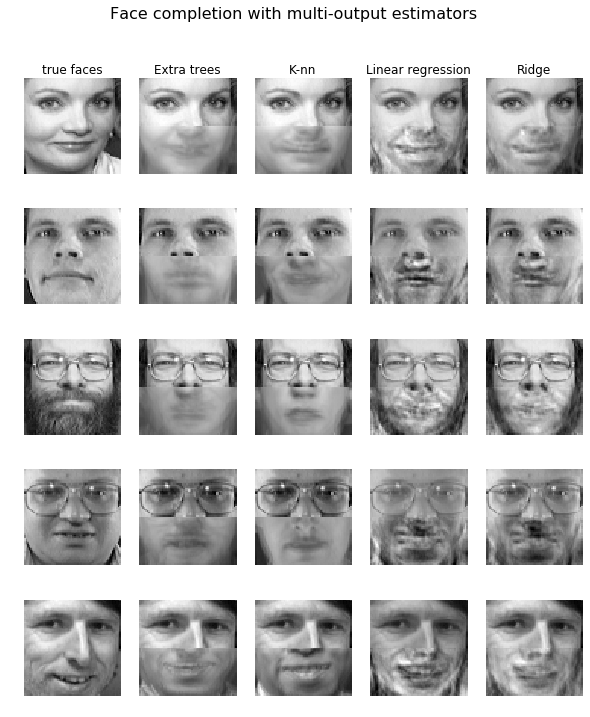

In [8]:
# Fit estimators
ESTIMATORS = {
#     "Random Forest": RandomForestRegressor(n_estimators=10, random_state=0),
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": Ridge(alpha=1),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()